<a href="https://colab.research.google.com/github/nsprabha/Dark_pattern_dataset/blob/colabtrial/dataset_enhancement_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
tsv_df = pd.read_csv("/content/dataset.tsv", sep='\t')
csv_df = pd.read_csv("/content/dark_patterns_1.csv")

In [2]:
csv_df.head()

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website?,Deceptive?,Website Page
0,Collin P. from Grandview Missouri just bought ...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://alaindupetit.com/collections/all-suits...
1,"Faith in Glendale, United States purchased a C...",Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bonescoffee.com/products/strawberry-ch...
2,Sharmeen Atif From Karachi just bought Stylish...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://brandsego.com/collections/under-rs-99/...
3,9 people are viewing this.,Product detail,Social Proof,Activity Notification,Product Page,No,https://brightechshop.com/products/ambience-so...
4,5338 people viewed this in the last hour,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bumpboxes.com/


In [32]:
#csv_df.drop('Website Page',axis=1,inplace=True)
#csv_df.drop('Deceptive?',axis=1,inplace=True)
#csv_df['label'] = 1
csv_df.head()

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website?,label
0,Collin P. from Grandview Missouri just bought ...,Periodic popup,Social Proof,Activity Notification,Product Page,1
1,"Faith in Glendale, United States purchased a C...",Periodic popup,Social Proof,Activity Notification,Product Page,1
2,Sharmeen Atif From Karachi just bought Stylish...,Periodic popup,Social Proof,Activity Notification,Product Page,1
3,9 people are viewing this.,Product detail,Social Proof,Activity Notification,Product Page,1
4,5338 people viewed this in the last hour,Periodic popup,Social Proof,Activity Notification,Product Page,1


In [4]:
tsv_df['Comment'] = None
tsv_df['Pattern Type'] = None
tsv_df['Where in website?'] = None
print(tsv_df.head())

   page_id                                               text  label  \
0     1012            FLASH SALE | LIMITED TIME ONLY Shop Now      1   
1      158                                Pillowcases & Shams      0   
2      108                                     Write a review      0   
3     1425  To start your return, simply click on the foll...      0   
4     1658                newsletter signup (privacy policy)       0   

   Pattern Category Comment Pattern Type Where in website?  
0           Urgency    None         None              None  
1  Not Dark Pattern    None         None              None  
2  Not Dark Pattern    None         None              None  
3  Not Dark Pattern    None         None              None  
4  Not Dark Pattern    None         None              None  


In [5]:
tsv_df.tail()

,page_id,text,label,Pattern Category,Comment,Pattern Type,Where in website?
2351,1304,Bra Panty Set,0,Not Dark Pattern,None,None,None
2352,1038,DressesFootwearHatsHoodies & SweatshirtsJersey...,0,Not Dark Pattern,None,None,None
2353,1081,Only 4 left in stock,1,Scarcity,None,None,None
2354,767,Trending Players,0,Not Dark Pattern,None,None,None
2355,1468,10 Left in stock,1,Scarcity,None,None,None


In [6]:
#tsv_df.drop('page_id',axis=1,inplace=True)

In [8]:
tsv_df.head()

,text,label,Pattern Category,Comment,Pattern Type,Where in website?
0,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency,None,None,None
1,Pillowcases & Shams,0,Not Dark Pattern,None,None,None
2,Write a review,0,Not Dark Pattern,None,None,None
3,"To start your return, simply click on the foll...",0,Not Dark Pattern,None,None,None
4,newsletter signup (privacy policy),0,Not Dark Pattern,None,None,None


In [9]:
csv_df.info()
csv_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pattern String     1512 non-null   object
 1   Comment            1798 non-null   object
 2   Pattern Category   1818 non-null   object
 3   Pattern Type       1818 non-null   object
 4   Where in website?  1818 non-null   object
 5   label              1818 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 85.3+ KB


,label
count,1818.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [10]:
csv_df.dropna(inplace=True)

In [11]:
csv_df.info()
csv_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1494 entries, 0 to 1817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pattern String     1494 non-null   object
 1   Comment            1494 non-null   object
 2   Pattern Category   1494 non-null   object
 3   Pattern Type       1494 non-null   object
 4   Where in website?  1494 non-null   object
 5   label              1494 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 81.7+ KB


,label
count,1494.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier


# NLP-Based Approach (TF-IDF + KNN)
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(csv_df["Pattern String"])
y_train = csv_df["Comment"]

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

X_test = tfidf.transform(tsv_df["text"])
predicted_comments = knn.predict(X_test)

tsv_df["Comment"] = predicted_comments

# Save the filled dataset
tsv_df.to_csv("tsv_dftext_filled.csv")

In [15]:
ft=pd.read_csv("tsv_dftext_filled.csv")
ft.head()

,Unnamed: 0,text,label,Pattern Category,Comment,Pattern Type,Where in website?
0,0,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency,Product detail,NaN,NaN
1,1,Pillowcases & Shams,0,Not Dark Pattern,Cart,NaN,NaN
2,2,Write a review,0,Not Dark Pattern,Account creation,NaN,NaN
3,3,"To start your return, simply click on the foll...",0,Not Dark Pattern,Email to cancel,NaN,NaN
4,4,newsletter signup (privacy policy),0,Not Dark Pattern,Cart,NaN,NaN


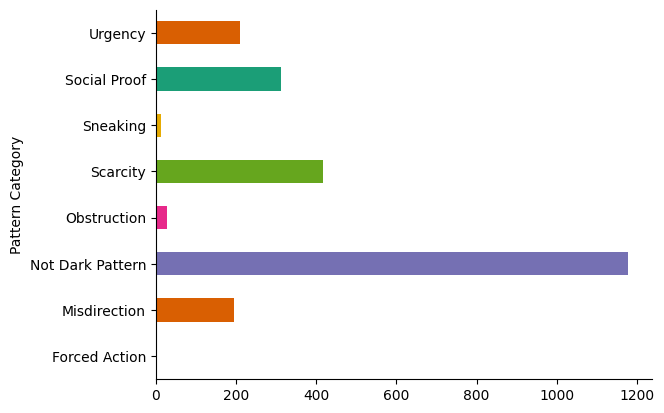

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
ft.groupby('Pattern Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
tsv_df1=pd.read_csv("/content/tsv_dftext_filled.csv")
# NLP-Based Approach (TF-IDF + KNN)
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(csv_df["Pattern String"])
y_train = csv_df["Pattern Type"]

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

X_test = tfidf.transform(tsv_df1["text"])
predicted_comments = knn.predict(X_test)

tsv_df1["Pattern Type"] = predicted_comments

# Save the filled dataset
tsv_df1.to_csv("tsv_dftext_filled2.csv")

In [19]:
ft2=pd.read_csv("tsv_dftext_filled2.csv")
ft2.head()

,Unnamed: 0.1,Unnamed: 0,text,label,Pattern Category,Comment,Pattern Type,Where in website?
0,0,0,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency,Product detail,Limited-time Message,NaN
1,1,1,Pillowcases & Shams,0,Not Dark Pattern,Cart,Hard to Cancel,NaN
2,2,2,Write a review,0,Not Dark Pattern,Account creation,Hard to Cancel,NaN
3,3,3,"To start your return, simply click on the foll...",0,Not Dark Pattern,Email to cancel,Hard to Cancel,NaN
4,4,4,newsletter signup (privacy policy),0,Not Dark Pattern,Cart,Pressured Selling,NaN


In [20]:
tsv_df2=pd.read_csv("/content/tsv_dftext_filled2.csv")
# NLP-Based Approach (TF-IDF + KNN)
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(csv_df["Pattern String"])
y_train = csv_df["Where in website?"]

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

X_test = tfidf.transform(tsv_df2["text"])
predicted_comments = knn.predict(X_test)

tsv_df2["Where in website?"] = predicted_comments

# Save the filled dataset
tsv_df2.to_csv("tsv_dftext_filled3.csv")

In [21]:
ft3=pd.read_csv("tsv_dftext_filled3.csv")
ft3.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,text,label,Pattern Category,Comment,Pattern Type,Where in website?
0,0,0,0,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency,Product detail,Limited-time Message,Product Page
1,1,1,1,Pillowcases & Shams,0,Not Dark Pattern,Cart,Hard to Cancel,Other Page
2,2,2,2,Write a review,0,Not Dark Pattern,Account creation,Hard to Cancel,Product Page
3,3,3,3,"To start your return, simply click on the foll...",0,Not Dark Pattern,Email to cancel,Hard to Cancel,Other Page
4,4,4,4,newsletter signup (privacy policy),0,Not Dark Pattern,Cart,Pressured Selling,Product Page


In [29]:
#ft3.drop('Unnamed: 0.2',axis=1,inplace=True)
ft3.head()


,text,label,Pattern Category,Comment,Pattern Type,Where in website?
0,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency,Product detail,Limited-time Message,Product Page
1,Pillowcases & Shams,0,Not Dark Pattern,Cart,Hard to Cancel,Other Page
2,Write a review,0,Not Dark Pattern,Account creation,Hard to Cancel,Product Page
3,"To start your return, simply click on the foll...",0,Not Dark Pattern,Email to cancel,Hard to Cancel,Other Page
4,newsletter signup (privacy policy),0,Not Dark Pattern,Cart,Pressured Selling,Product Page


In [30]:
from sklearn.metrics import confusion_matrix

# Load your data
tsv_dftext = pd.read_csv("/content/tsv_dftext_filled3.csv")  # Use sep="\t" for TSV files

# 1. Confusion Matrix for 'label' (whether it's a dark pattern)
cm_label = confusion_matrix(tsv_dftext["label"], tsv_dftext["label"])
print("Confusion Matrix for 'label':")
print(cm_label)

# 2. Confusion Matrix for 'Pattern Category'
cm_pattern_category = confusion_matrix(tsv_dftext["Pattern Category"], tsv_dftext["Pattern Category"])
print("Confusion Matrix for 'Pattern Category':")
print(cm_pattern_category)

# 3. Confusion Matrix for 'Pattern Type'
cm_pattern_type = confusion_matrix(tsv_dftext["Pattern Type"], tsv_dftext["Pattern Type"])
print("Confusion Matrix for 'Pattern Type':")
print(cm_pattern_type)

# 4. Confusion Matrix for 'Where in website?'
cm_where_in_website = confusion_matrix(tsv_dftext["Where in website?"], tsv_dftext["Where in website?"])
print("Confusion Matrix for 'Where in website?':")
print(cm_where_in_website)

Confusion Matrix for 'label':
[[1178    0]
 [   0 1178]]
Confusion Matrix for 'Pattern Category':
[[   4    0    0    0    0    0    0    0]
 [   0  195    0    0    0    0    0    0]
 [   0    0 1178    0    0    0    0    0]
 [   0    0    0   27    0    0    0    0]
 [   0    0    0    0  418    0    0    0]
 [   0    0    0    0    0   12    0    0]
 [   0    0    0    0    0    0  312    0]
 [   0    0    0    0    0    0    0  210]]
Confusion Matrix for 'Pattern Type':
[[544   0   0   0   0   0   0   0   0   0   0   0]
 [  0 257   0   0   0   0   0   0   0   0   0   0]
 [  0   0 148   0   0   0   0   0   0   0   0   0]
 [  0   0   0   6   0   0   0   0   0   0   0   0]
 [  0   0   0   0 538   0   0   0   0   0   0   0]
 [  0   0   0   0   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   0  47   0   0   0   0   0]
 [  0   0   0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0   0   0 508   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109   0   0]
 [  0   0 